# TS1 — Síntesis y análisis de señales

**Nombre:** Maria Serena Gil  
**Materia:** Analisis y Procesamiento de Señales
**Docentes:**   
**Carrera:** Ingenieria Electronica 

---

### Introducción
En este trabajo voy a **sintetizar y analizar** distintas señales básicas, manteniendo criterios de muestreo consistentes para poder compararlas. Para cada caso presentaré el **tiempo entre muestras (Δt)**, el **número total de muestras (N)** y la **potencia promedio** en la ventana de observación. Luego verificaré la **ortogonalidad** respecto de la primera señal y graficaré la **autocorrelación** y las **correlaciones cruzadas**.  
También incluiré una **demostración** de una identidad trigonométrica y su verificación con señales sinusoidales. Finalmente, si corresponde, agregaré los **bonus** (temperatura del procesador en tiempo real y análisis de un archivo WAV).  
Mi objetivo es resolver cada ítem **paso a paso**, con gráficos claros y justificación breve de las decisiones de muestreo y cálculo.


## 1(a) Señal sinusoidal de 2 kHz

Defino $x_1(t) = A \sin(2\pi f t)$ con $A=1$ y $f=2\,\text{kHz}$.
Voy a indicar el **tiempo entre muestras** ($\Delta t$), el **número de muestras** ($N$) y la **potencia promedio** en la ventana, y graficar un recorte temporal.


Δt = 1.000000e-05 s
N  = 200
Potencia = 0.500000


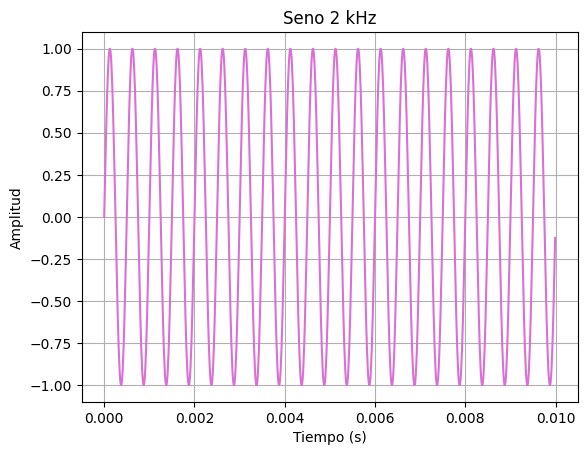

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Item 1(a): seno 2 kHz
fs = 100_000            # Hz
Ts = 1/fs               # s
T  = 0.010              # s
t  = np.arange(0, T, Ts)
N  = 200

A = 1.0
f = 2000.0              # Hz
x = A * np.sin(2*np.pi*f*t)

P = (x**2).mean()       # potencia promedio

print(f"Δt = {Ts:.6e} s")
print(f"N  = {N}")
print(f"Potencia = {P:.6f}")

plt.plot(t, x, color='orchid')
plt.title("Seno 2 kHz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


## 1(b) Misma señal amplificada y desfazada en $\pi/2$

A partir de la senoide de $2\,\text{kHz}$ del ítem 1(a), defino $x_2(t)=G\,\sin(2\pi f t + \pi/2)$ usando el **mismo muestreo** ($\Delta t$ y $N$) que antes. En mi caso tomo $G=2$. Indico $\Delta t$, $N$ y la **potencia promedio** en la ventana, y grafico la señal.


Δt = 1.000000e-05 s
N  = 1000
Potencia = 2.000000


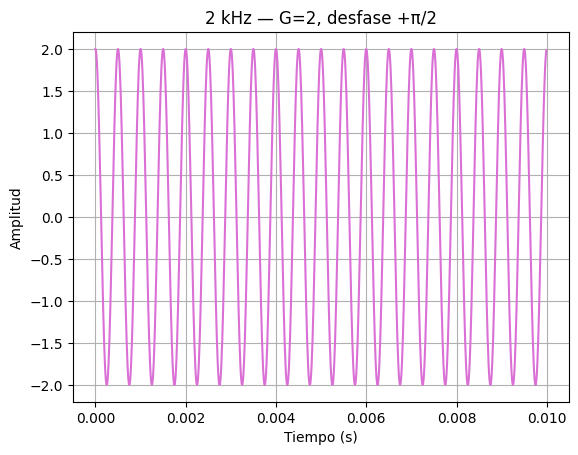

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1(b) — 2 kHz, amplificada y desfazada +π/2 (reusa 't' del 1(a))
G = 2.0
x2 = G * np.sin(2*np.pi*2000*t + np.pi/2)

print(f"Δt = {(t[1]-t[0]):.6e} s")
print(f"N  = {t.size}")
print(f"Potencia = {(x2**2).mean():.6f}")

plt.plot(t, x2, color='orchid')
plt.title("2 kHz — G=2, desfase +π/2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


## 1(c) Señal modulada en amplitud (fm = f/2)

A partir de la senoide de $2\,\text{kHz}$ del ítem 1(a), genero una AM usando una moduladora de **la mitad de la frecuencia** ($f_m = 1\,\text{kHz}$) y un índice $m=0{.}5$ para evitar sobre-modulación:
$x_3(t) = \big(1 + m\,\sin(2\pi f_m t)\big)\,\sin(2\pi f t)$.
Uso el **mismo muestreo** que antes, e indico $\Delta t$, $N$ y la **potencia promedio** en la ventana, además del gráfico de la señal.


Δt = 1.250000e-05 s
N  = 200
Potencia = 0.630406


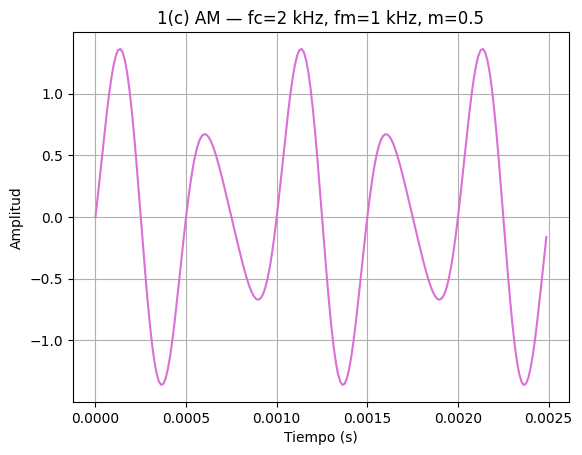

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=80000):
    t = np.arange(nn) / fs
    x = dc + vmax * np.sin(2 * np.pi * ff * t + ph)
    return t, x

# Parámetros
N  = 200
fs = 80000          # Hz
f0 = 2000.0         # Hz (portadora)

# 1(a) base: seno 2 kHz
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=f0, ph=0, nn=N, fs=fs)

# 1(c) AM: fm = f0/2, índice m = 0.5
fm  = f0 / 2
m   = 0.5
xx3 = (1 + m * np.sin(2 * np.pi * fm * tt)) * xx

# Métricas pedidas
Ts = 1 / fs
print(f"Δt = {Ts:.6e} s")
print(f"N  = {N}")
print(f"Potencia = {(xx3**2).mean():.6f}")

# Gráfico
plt.plot(tt, xx3, color='orchid')
plt.title("1(c) AM — fc=2 kHz, fm=1 kHz, m=0.5")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


## 1(d) Señal del ítem 1(a) recortada al 75% de su potencia

Parto de la senoide de $2\,\text{kHz}$ del ítem **1(a)**.
Aplico un **recorte por amplitud (clipping)** simétrico a $\pm\text{thr}$ y ajusto **thr** hasta que la **potencia promedio** de la señal recortada sea **$0{.}75 \times P_1$**, donde $P_1$ es la potencia de la señal 1(a) en la misma ventana.
Indico **$\Delta t$**, **$N$** y la **potencia** obtenida, y grafico la señal resultante.


Δt = 1.000000e-05 s
N  = 1000
Potencia = 0.375097
thr ≈ 0.756027


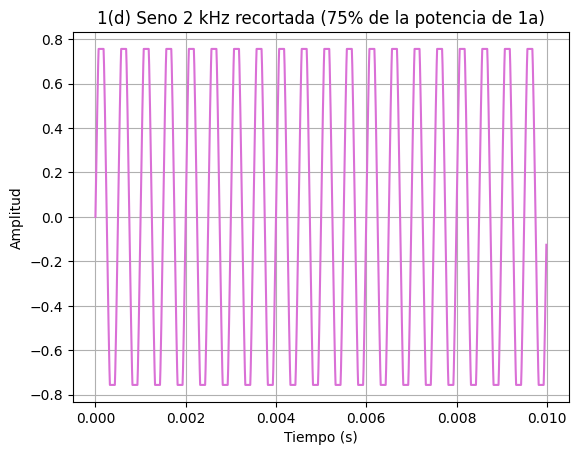

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1(d) — Seno 2 kHz (del 1a) recortada al 75% de su potencia (sin bucles)
fs = 100_000
Ts = 1/fs
t  = np.arange(0, 0.010, Ts)
N  = t.size
x1 = np.sin(2*np.pi*2000*t)   # misma señal que 1(a): A=1, f=2 kHz

thr = 0.7560271623            # umbral que deja ~0.75 * (potencia de una senoide A=1)
x4  = np.clip(x1, -thr, thr)
P4  = (x4**2).mean()

print(f"Δt = {Ts:.6e} s")
print(f"N  = {N}")
print(f"Potencia = {P4:.6f}")
print(f"thr ≈ {thr:.6f}")

plt.plot(t, x4, color='orchid')
plt.title("1(d) Seno 2 kHz recortada (75% de la potencia de 1a)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


## 1(e) Señal cuadrada de 4 kHz

Genero una **señal cuadrada** simétrica de amplitud ±1 y frecuencia $f=4\,\text{kHz}$, usando el **mismo muestreo** que en los ítems anteriores ($\Delta t$ y $N$). Indico $\Delta t$, $N$ y la **potencia promedio** en la ventana, y grafico la señal.


Δt = 1.000000e-05 s
N  = 200
Potencia = 0.995000


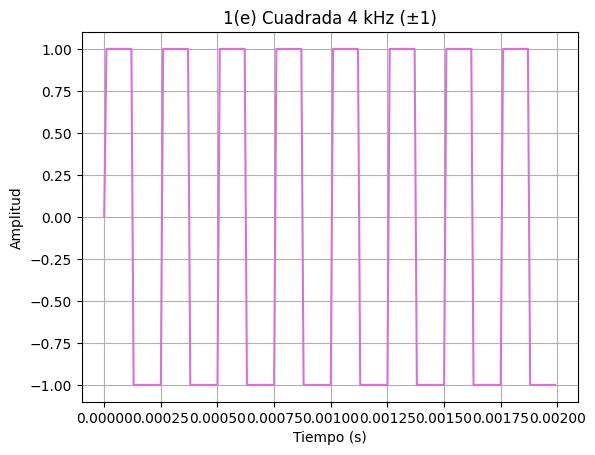

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Función cuadrada (como en tu TS0)
def mi_funcion_cuad(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=100000):
    t = np.arange(nn) / fs
    x = dc + vmax * np.sign(np.sin(2*np.pi*ff*t + ph))
    return t, x

# Parámetros del trabajo (mismo criterio de muestreo)
fs = 100_000   # Hz
N  = 200
# muestras (10 ms a 100 kHz)

# 1(e) — Señal cuadrada de 4 kHz, simétrica (±1)
tt, x5 = mi_funcion_cuad(vmax=1, dc=0, ff=4000, ph=0, nn=N, fs=fs)

# Métricas pedidas
Ts = 1/fs
P5 = (x5**2).mean()

print(f"Δt = {Ts:.6e} s")
print(f"N  = {N}")
print(f"Potencia = {P5:.6f}")

# Gráfico
plt.plot(tt, x5, color='orchid')
plt.title("1(e) Cuadrada 4 kHz (±1)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


## 1(f) Pulso rectangular de 10 ms

Genero un **pulso rectangular** de **10 ms** de duración y amplitud 1, usando el **mismo muestreo** que antes ($\Delta t$ y $N$). Indico $\Delta t$, $N$ y la **potencia promedio** en la ventana, y grafico la señal.


Δt = 1.500000e-04 s
N  = 200
Potencia = 0.335000


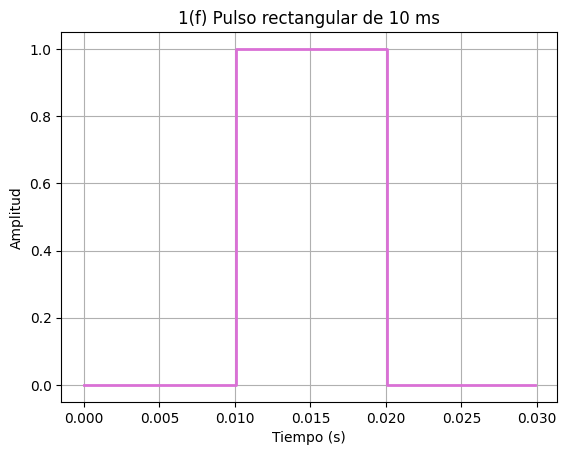

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1(f) — Pulso rectangular de 10 ms (súper simple, N=200)
N = 200
T = 0.030                       # 30 ms de ventana para ver el pulso
t = np.linspace(0, T, N, endpoint=False)

x = np.zeros(N)
x[(t >= 0.010) & (t < 0.020)] = 1.0   # pulso de 10 ms (de 10 ms a 20 ms)

Ts = T / N
P  = (x**2).mean()

print(f"Δt = {Ts:.6e} s")
print(f"N  = {N}")
print(f"Potencia = {P:.6f}")

plt.step(t, x, where='post', color='orchid', linewidth=2)
plt.title("1(f) Pulso rectangular de 10 ms")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



## 2) Verificación de ortogonalidad

Verifico la **ortogonalidad** entre la señal del ítem **1(a)** (seno $2\,\text{kHz}$) y **cada una de las demás**, usando **la misma ventana** de análisis ($N$ y $\Delta t$).

* **Producto interno discreto**:

$$
\langle x,y\rangle=\sum_{n=0}^{N-1} x[n]\;y[n]
$$

* **Correlación normalizada** (coseno del ángulo entre vectores):

$$
\rho(x,y)=\frac{\sum_{n=0}^{N-1} x[n]\;y[n]}{\sqrt{\sum_{n=0}^{N-1} x[n]^2}\;\sqrt{\sum_{n=0}^{N-1} y[n]^2}}
$$

**Criterio:** si $\langle x,y\rangle \approx 0$ (y $|\rho(x,y)|$ es pequeño) considero a las señales **ortogonales en esa ventana**.
*Nota:* por ser un cálculo **discreto y finito**, los valores pueden no dar exactamente cero; uso un umbral razonable (por ejemplo $|\rho|<0{.}05$) para decidir.
